# Importing and Cleaning

In [59]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [60]:
essa = pd.read_excel('data/2020 ESSA Data.xlsx')
essa['School ID'] = essa['IDOE School ID']
essa.drop(essa.loc[essa['School ID'] == '8886'].index, inplace=True)
school = pd.read_excel('data/SuccessBySchool.xlsx')

In [61]:
# set columns
school.columns = school.iloc[4]


# drop first rows
school = school.drop(school.index[0:5],axis=0)
school = school.reset_index(drop=True)

#drop first two columns add grade
school['grade'] = None
school = pd.concat([school.iloc[:,[0,1,2,3,53]],school.iloc[:,4:53]],axis=1)
school

4,Corp ID,Corp Name,School ID,School Name,grade,ELA\nBelow\nProficiency,ELA \nApproaching\nProficiency,ELA \nAt\nProficiency,ELA \nAbove\nProficiency,ELA\nTotal\nProficient,...,ELA\nTotal\nProficient,ELA\nTotal\nTested,ELA\nProficient \n%,ELA\nBelow\nProficiency,ELA \nApproaching\nProficiency,ELA \nAt\nProficiency,ELA \nAbove\nProficiency,ELA\nTotal\nProficient,ELA\nTotal\nTested,ELA\nProficient \n%
0,0015,Adams Central Community Schools,0013,Adams Central Middle School,None,NaN,NaN,NaN,NaN,NaN,...,39,79,0.493671,50,84,75,71,146,280,0.521429
1,0015,Adams Central Community Schools,0020,Adams Central Elementary School,None,20,22,24,24,48,...,NaN,NaN,NaN,70,70,101,50,151,291,0.5189
2,0025,North Adams Community Schools,0033,Bellmont Middle School,None,NaN,NaN,NaN,NaN,NaN,...,53,110,0.481818,77,90,90,49,139,306,0.454248
3,0025,North Adams Community Schools,0037,Bellmont Elementary,None,48,31,23,4,27,...,NaN,NaN,NaN,154,89,76,19,95,338,0.281065
4,0035,South Adams Schools,0017,South Adams Middle School,None,NaN,NaN,NaN,NaN,NaN,...,41,71,0.577465,52,75,81,45,126,253,0.498024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,-999,Independent Non-Public Schools,D875,Kingdom Academy of Bluffton Inc,None,***,***,***,***,***,...,***,3,***,4,10,6,4,10,24,0.416667
1803,-999,Independent Non-Public Schools,D907,T.R.O.Y. Center,None,NaN,NaN,NaN,NaN,NaN,...,***,3,***,***,***,***,***,***,6,***
1804,-999,Independent Non-Public Schools,D913,Israel School of Excellence,None,***,***,***,***,***,...,***,3,***,13,3,6,0,6,22,0.272727
1805,-999,Independent Non-Public Schools,D917,World Changers School of the Arts,None,NaN,NaN,NaN,NaN,NaN,...,***,3,***,***,***,***,***,***,5,***


In [62]:
# # test restructure data
# test = school.loc[school['School ID'] == '0013']

# grade3 = test.iloc[:,0:12]
# grade3['grade'] = '3'

# grade4 = pd.concat([test.iloc[:,0:5],test.iloc[:,12:19]],axis=1)
# grade4['grade'] = '4'

# grade5 = pd.concat([test.iloc[:,0:5],test.iloc[:,19:26]],axis=1)
# grade5['grade'] = '5'

# grade6 = pd.concat([test.iloc[:,0:5],test.iloc[:,26:33]],axis=1)
# grade6['grade'] = '6'

# grade7 = pd.concat([test.iloc[:,0:5],test.iloc[:,33:40]],axis=1)
# grade7['grade'] = '7'

# grade8 = pd.concat([test.iloc[:,0:5],test.iloc[:,40:47]],axis=1)
# grade8['grade'] = '8'

# gradeT = pd.concat([test.iloc[:,0:5],test.iloc[:,47:53]],axis=1)
# gradeT['grade'] = 'total'

# test = pd.concat([grade3,grade4,grade5,grade6,grade7,grade8,gradeT])
# test

In [63]:
# looping restructure
restruct_school = pd.DataFrame()
for row in school:
    grade3 = school.iloc[:,0:12]
    grade3['grade'] = '3'

    grade4 = pd.concat([school.iloc[:,0:5],school.iloc[:,12:19]],axis=1)
    grade4['grade'] = '4'

    grade5 = pd.concat([school.iloc[:,0:5],school.iloc[:,19:26]],axis=1)
    grade5['grade'] = '5'

    grade6 = pd.concat([school.iloc[:,0:5],school.iloc[:,26:33]],axis=1)
    grade6['grade'] = '6'

    grade7 = pd.concat([school.iloc[:,0:5],school.iloc[:,33:40]],axis=1)
    grade7['grade'] = '7'

    grade8 = pd.concat([school.iloc[:,0:5],school.iloc[:,40:47]],axis=1)
    grade8['grade'] = '8'

    gradeT = pd.concat([school.iloc[:,0:5],school.iloc[:,47:53]],axis=1)
    gradeT['grade'] = 'total'
    
    restruct = pd.concat([grade3,grade4,grade5,grade6,grade7,grade8,gradeT])
    
    restruct_school = pd.concat([restruct])

In [64]:
# sort values
school = restruct_school.sort_values(['School ID','grade'])
school = school.reset_index(drop=True)
school

4,Corp ID,Corp Name,School ID,School Name,grade,ELA\nBelow\nProficiency,ELA \nApproaching\nProficiency,ELA \nAt\nProficiency,ELA \nAbove\nProficiency,ELA\nTotal\nProficient,ELA\nTotal\nTested,ELA\nProficient \n%
0,0015,Adams Central Community Schools,0013,Adams Central Middle School,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0015,Adams Central Community Schools,0013,Adams Central Middle School,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0015,Adams Central Community Schools,0013,Adams Central Middle School,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0015,Adams Central Community Schools,0013,Adams Central Middle School,6,19,33,23,25,48,100,0.48
4,0015,Adams Central Community Schools,0013,Adams Central Middle School,7,15,27,30,29,59,101,0.584158
...,...,...,...,...,...,...,...,...,...,...,...,...
12644,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12645,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12646,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12647,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# rename columns
school.columns = ['Corp ID','Corp Name','School ID','School Name','Grade','BelowProf','ApproachingProf','AtProf','AboveProf','TotalProf','TotalTested','ProfPercent']
school

,Corp ID,Corp Name,School ID,School Name,Grade,BelowProf,ApproachingProf,AtProf,AboveProf,TotalProf,TotalTested,ProfPercent
0,0015,Adams Central Community Schools,0013,Adams Central Middle School,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0015,Adams Central Community Schools,0013,Adams Central Middle School,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0015,Adams Central Community Schools,0013,Adams Central Middle School,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0015,Adams Central Community Schools,0013,Adams Central Middle School,6,19,33,23,25,48,100,0.48
4,0015,Adams Central Community Schools,0013,Adams Central Middle School,7,15,27,30,29,59,101,0.584158
...,...,...,...,...,...,...,...,...,...,...,...,...
12644,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12645,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12646,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12647,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# replace *** with NaN
sliced = school.loc[:,'BelowProf':'ProfPercent']

for col in sliced:
    school[col] = pd.to_numeric(sliced.loc[:,col],errors='coerce')

In [67]:
#recalc prof percent
school['ProfPercent'] = school['TotalProf']/school['TotalTested']

# Analysis
### *Hypothesis* - Students at Schools with lower funding on average will perform worse on ELA ILEARN than students at schools with higher funding

In [68]:
# merge data
merged = pd.merge(school,essa,on='School ID',validate='m:1')
merged.drop(['School vs. Corp Percent Change','School vs.State Percent Change'], inplace=True, axis=1)
merged

,Corp ID,Corp Name,School ID,School Name_x,Grade,BelowProf,ApproachingProf,AtProf,AboveProf,TotalProf,...,School Per/Student,Corp Per/Student,State Per/Student,Instructional per/student,OtherInstructional per/student,InstructionalShared per/student,Operational per/student,OperationalShared per/student,FedFund per/student,StateLocalFund per/student
0,0015,Adams Central Community Schools,0013,Adams Central Middle School,3,NaN,NaN,NaN,NaN,NaN,...,8171.88,8455.18,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83
1,0015,Adams Central Community Schools,0013,Adams Central Middle School,4,NaN,NaN,NaN,NaN,NaN,...,8171.88,8455.18,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83
2,0015,Adams Central Community Schools,0013,Adams Central Middle School,5,NaN,NaN,NaN,NaN,NaN,...,8171.88,8455.18,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83
3,0015,Adams Central Community Schools,0013,Adams Central Middle School,6,19.0,33.0,23.0,25.0,48.0,...,8171.88,8455.18,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83
4,0015,Adams Central Community Schools,0013,Adams Central Middle School,7,15.0,27.0,30.0,29.0,59.0,...,8171.88,8455.18,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN
12260,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN
12261,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN
12262,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [69]:
# create money totals
merged['TotalSpending'] = merged.iloc[:,18:26].sum(axis=1)
merged['TotalFunding'] = merged.iloc[:,26:27].sum(axis=1)
merged

,Corp ID,Corp Name,School ID,School Name_x,Grade,BelowProf,ApproachingProf,AtProf,AboveProf,TotalProf,...,State Per/Student,Instructional per/student,OtherInstructional per/student,InstructionalShared per/student,Operational per/student,OperationalShared per/student,FedFund per/student,StateLocalFund per/student,TotalSpending,TotalFunding
0,0015,Adams Central Community Schools,0013,Adams Central Middle School,3,NaN,NaN,NaN,NaN,NaN,...,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83,25874.42,7424.83
1,0015,Adams Central Community Schools,0013,Adams Central Middle School,4,NaN,NaN,NaN,NaN,NaN,...,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83,25874.42,7424.83
2,0015,Adams Central Community Schools,0013,Adams Central Middle School,5,NaN,NaN,NaN,NaN,NaN,...,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83,25874.42,7424.83
3,0015,Adams Central Community Schools,0013,Adams Central Middle School,6,19.0,33.0,23.0,25.0,48.0,...,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83,25874.42,7424.83
4,0015,Adams Central Community Schools,0013,Adams Central Middle School,7,15.0,27.0,30.0,29.0,59.0,...,8500.31,5112.45,0.0,1029.75,0.0,2029.68,747.05,7424.83,25874.42,7424.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,5,NaN,NaN,NaN,NaN,NaN,...,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN,8500.31,0.00
12260,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,6,NaN,NaN,NaN,NaN,NaN,...,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN,8500.31,0.00
12261,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,7,NaN,NaN,NaN,NaN,NaN,...,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN,8500.31,0.00
12262,-999,Independent Non-Public Schools,D918,Alyssum Montessori School,8,NaN,NaN,NaN,NaN,NaN,...,8500.31,NaN,NaN,0.00,NaN,0.00,NaN,NaN,8500.31,0.00


<Axes: xlabel='TotalSpending', ylabel='ProfPercent'>

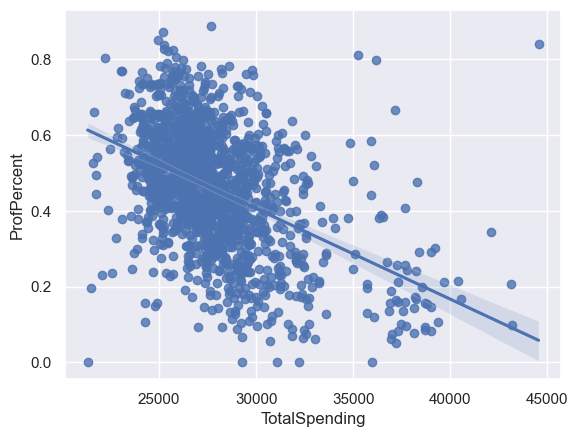

In [73]:
# plots
data_plot = merged.loc[merged['Grade'] == 'total']
data_plot = data_plot.loc[data_plot['TotalSpending']>15000]
sns.regplot(x='TotalSpending',y='ProfPercent',data=data_plot)

<Axes: xlabel='TotalFunding', ylabel='ProfPercent'>

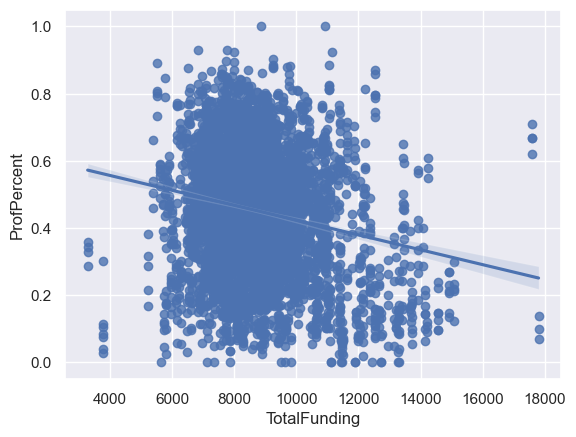

In [76]:
# plots
data_plot2 = merged.loc[merged['Grade'] == 'total']
data_plot2 = data_plot2.loc[data_plot2['TotalSpending']>15000]
sns.regplot(x='TotalFunding',y='ProfPercent',data=data_plot)